In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.getcwd()


'C:\\Users\\bpare\\Desktop\\Python Projects Jyupiter\\CEBD 1160 Project'

In [29]:
df = pd.read_csv('sales_train_v2.csv')
shop_59 = df[df['shop_id'].notnull() & (df['shop_id'] == 59)]
df2 = shop_59
shop_59

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
40084,10.01.2013,0,59,22151,399.0,1.0
77502,04.01.2013,0,59,5603,699.0,1.0
77503,19.01.2013,0,59,5587,199.0,2.0
77504,31.01.2013,0,59,5613,5571.0,1.0
77505,10.01.2013,0,59,5623,699.0,1.0
77506,14.01.2013,0,59,5623,699.0,1.0
77507,10.01.2013,0,59,5629,2390.0,1.0
77508,04.01.2013,0,59,5643,2390.0,1.0
77509,17.01.2013,0,59,5643,2390.0,2.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


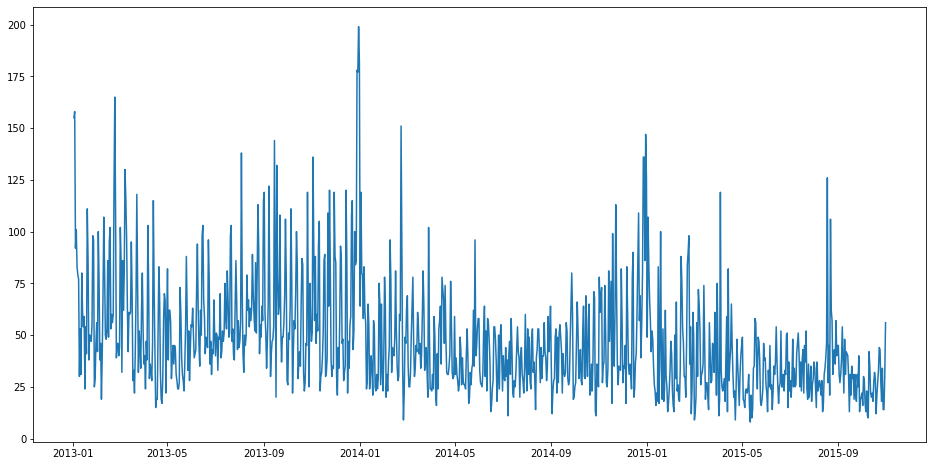

In [30]:
df2['date'] = pd.to_datetime(df2.date,format='%d.%m.%Y')
df2 = df2.groupby('date').item_cnt_day.sum().reset_index()
df2.index = df2['date']
df2['item_cnt_day'] = df2['item_cnt_day'].fillna(0) 
#plot
plt.figure(figsize=(16,8))
plt.plot(df2['item_cnt_day'], label='items sold per month ')

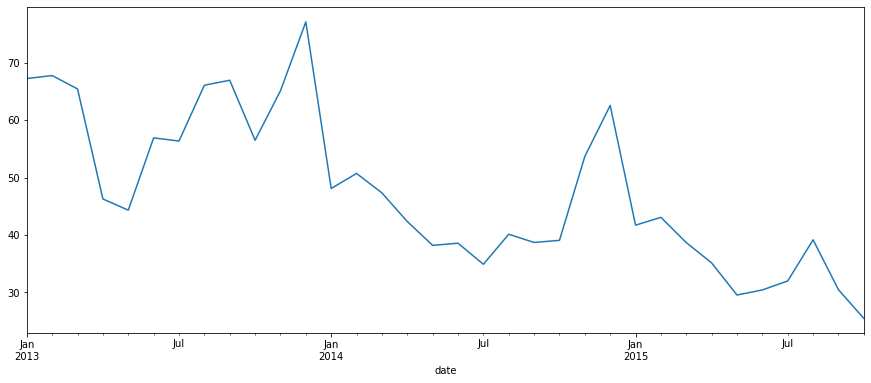

In [31]:
y = df2['item_cnt_day'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

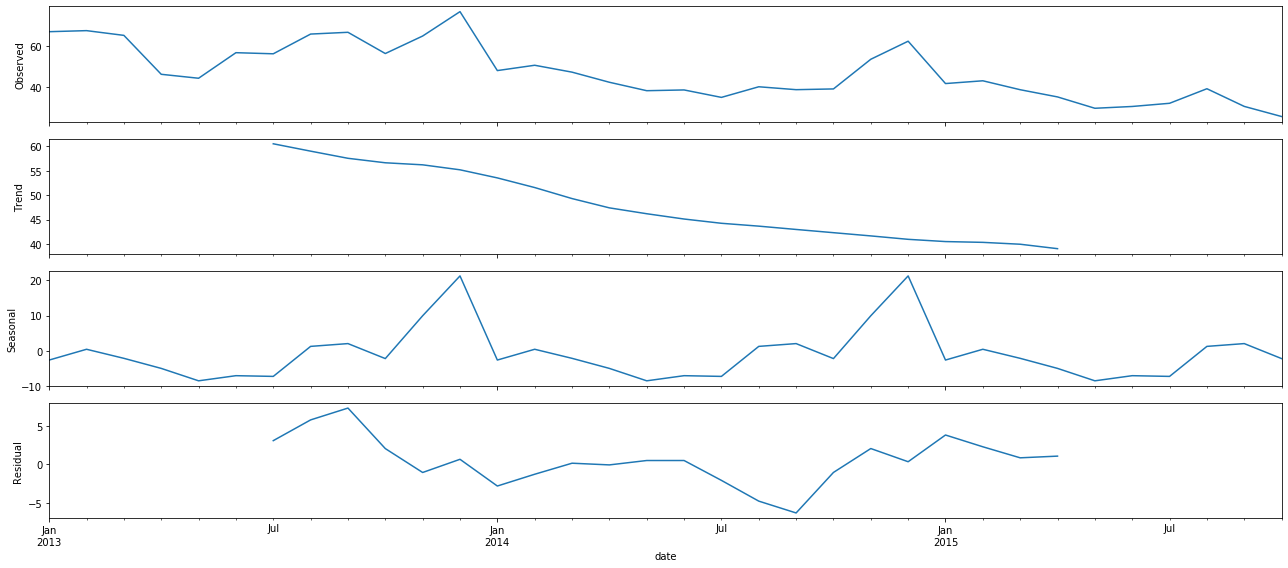

In [32]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y.fillna(0), model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
df = shop_59.rename(columns={"date_block_num": "months", "item_cnt_day": "total_items_month"})
df_sales = df.groupby('months').total_items_month.sum().reset_index()
dfX = df_sales['months']
dfy = df_sales['total_items_month']

In [34]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = dfy
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[2017. 1897. 2028. 1388.] 1374.0
[1897. 2028. 1388. 1374.] 1707.0
[2028. 1388. 1374. 1707.] 1747.0
[1388. 1374. 1707. 1747.] 2048.0
[1374. 1707. 1747. 2048.] 2008.0
[1707. 1747. 2048. 2008.] 1751.0
[1747. 2048. 2008. 1751.] 1953.0
[2048. 2008. 1751. 1953.] 2390.0
[2008. 1751. 1953. 2390.] 1491.0
[1751. 1953. 2390. 1491.] 1420.0
[1953. 2390. 1491. 1420.] 1467.0
[2390. 1491. 1420. 1467.] 1228.0
[1491. 1420. 1467. 1228.] 1184.0
[1420. 1467. 1228. 1184.] 1157.0
[1467. 1228. 1184. 1157.] 1082.0
[1228. 1184. 1157. 1082.] 1244.0
[1184. 1157. 1082. 1244.] 1161.0
[1157. 1082. 1244. 1161.] 1211.0
[1082. 1244. 1161. 1211.] 1610.0
[1244. 1161. 1211. 1610.] 1939.0
[1161. 1211. 1610. 1939.] 1293.0
[1211. 1610. 1939. 1293.] 1206.0
[1610. 1939. 1293. 1206.] 1199.0
[1939. 1293. 1206. 1199.] 1054.0
[1293. 1206. 1199. 1054.] 916.0
[1206. 1199. 1054.  916.] 913.0
[1199. 1054.  916.  913.] 992.0
[1054.  916.  913.  992.] 1214.0
[ 916.  913.  992. 1214.] 914.0
[ 913.  992. 1214.  914.] 790.0


In [35]:
#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.python.keras import datasets


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [37]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [38]:
# demonstrate prediction
x_input = array(dfy.tail(4))
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[792.02686]]
